<a href="https://colab.research.google.com/github/SuvarnaKaranam/Fault-Prediction-in-tablet-press-machine/blob/main/Fault_Prediction_in_tablet_press_equipment_ML_based.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploratory Data Analysis (EDA)**

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/Tablet_press_data.csv')  # Replace 'your_dataset.csv' with your actual dataset file

In [ ]:
# Display the first few rows of the dataset
print(df.head())

    Pressure  Temperature       Speed  Vibration   Humidity  \
0  62.512145    28.220422  758.141650   0.292994  49.799312   
1  69.941139    32.452611  590.881799   9.463787  48.547032   
2  60.912694    23.096572  741.749043   5.567093  58.904469   
3  76.515107    21.693767  680.608030   8.567299  61.665603   
4  82.498197    30.125321  669.042205   3.645664  46.897832   

   Maintenance_Cycles  Failure  
0                  13        0  
1                  10        1  
2                   6        1  
3                  12        1  
4                  13        0  


In [ ]:
# Summary statistics
print(df.describe())

          Pressure  Temperature        Speed    Vibration     Humidity  \
count  3814.000000  3814.000000  3814.000000  3814.000000  3814.000000   
mean     72.258969    30.057415   744.152294     4.338947    49.531163   
std      13.797415     4.625219   120.763851     2.632783     9.091816   
min      50.160913    20.000233   500.015359     0.002410    30.002113   
25%      59.791953    26.631294   647.534477     2.093484    42.907348   
50%      72.038137    30.333968   749.064972     4.119465    49.250958   
75%      84.048161    33.459332   838.308617     6.415797    56.238215   
max      99.985884    39.991154   999.675150     9.994607    69.980208   

       Maintenance_Cycles      Failure  
count         3814.000000  3814.000000  
mean            12.262192     0.500000  
std              3.336445     0.500066  
min              5.000000     0.000000  
25%             10.000000     0.000000  
50%             12.000000     0.500000  
75%             15.000000     1.000000  
max  

In [ ]:
# Check for missing values
print(df.isnull().sum())

Pressure              0
Temperature           0
Speed                 0
Vibration             0
Humidity              0
Maintenance_Cycles    0
Failure               0
dtype: int64


In [ ]:
# Data types of each column
print(df.dtypes)

Pressure              float64
Temperature           float64
Speed                 float64
Vibration             float64
Humidity              float64
Maintenance_Cycles      int64
Failure                 int64
dtype: object


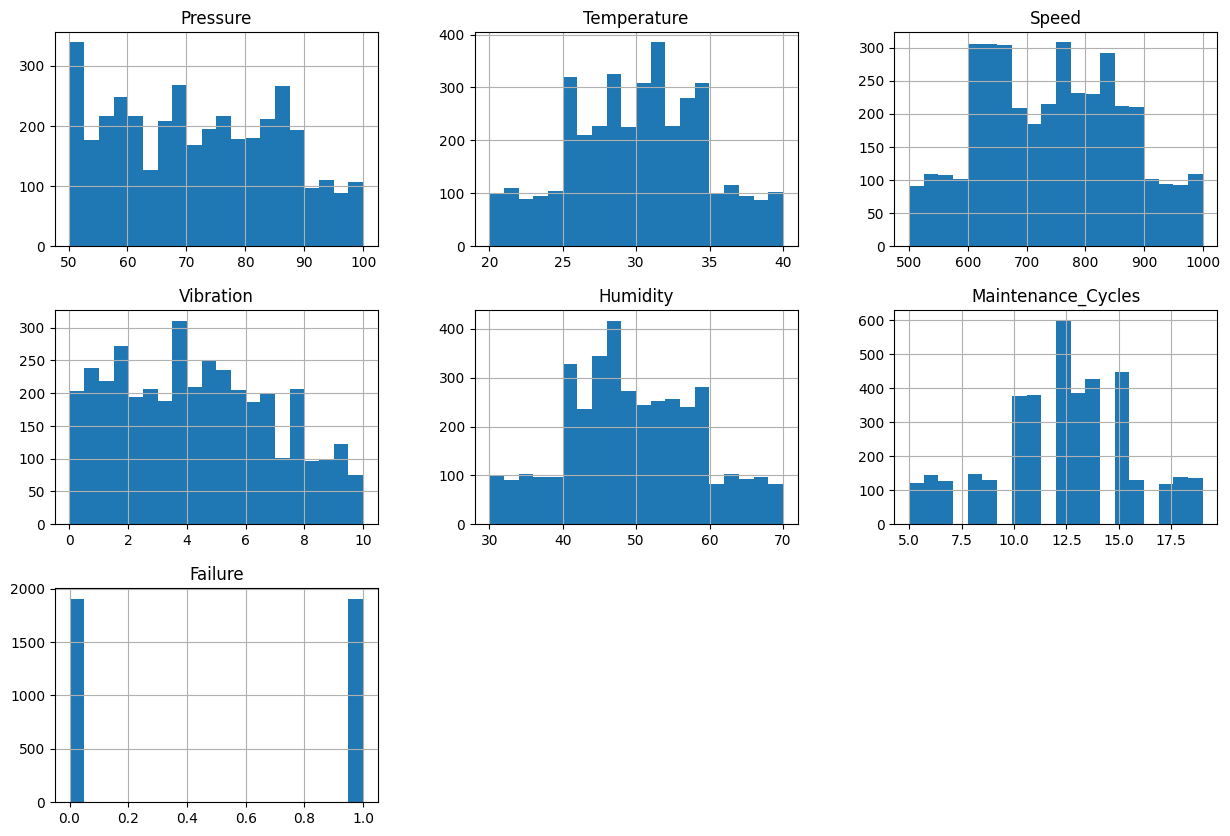

In [ ]:
# Visualize the distribution of numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.show()

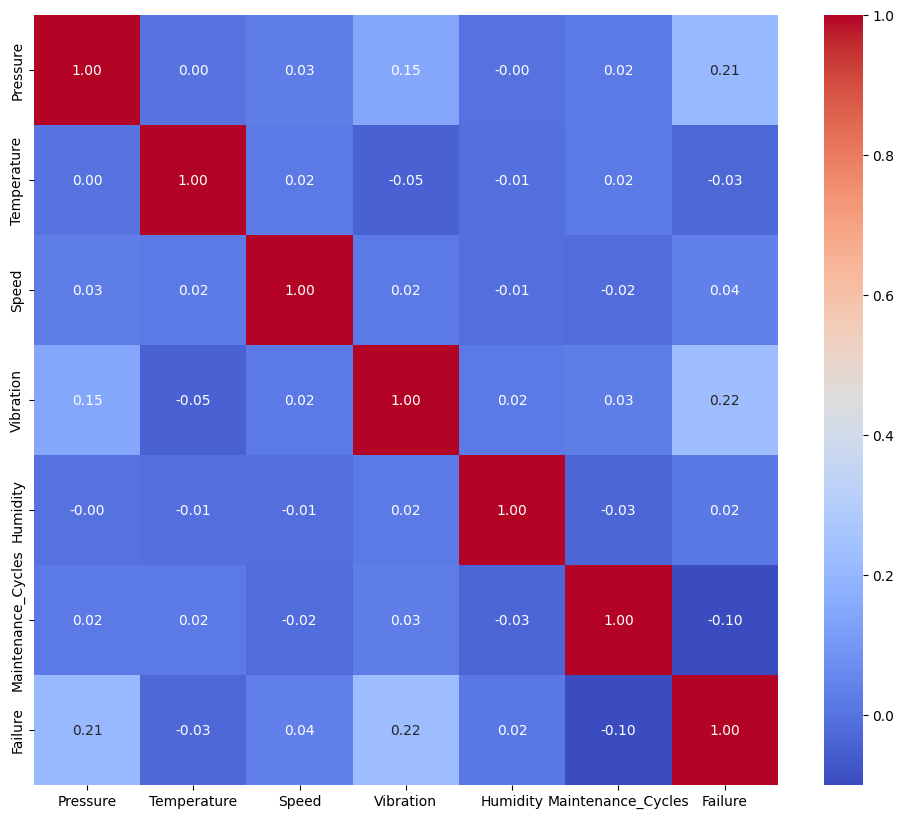

In [ ]:
# Correlation matrix heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

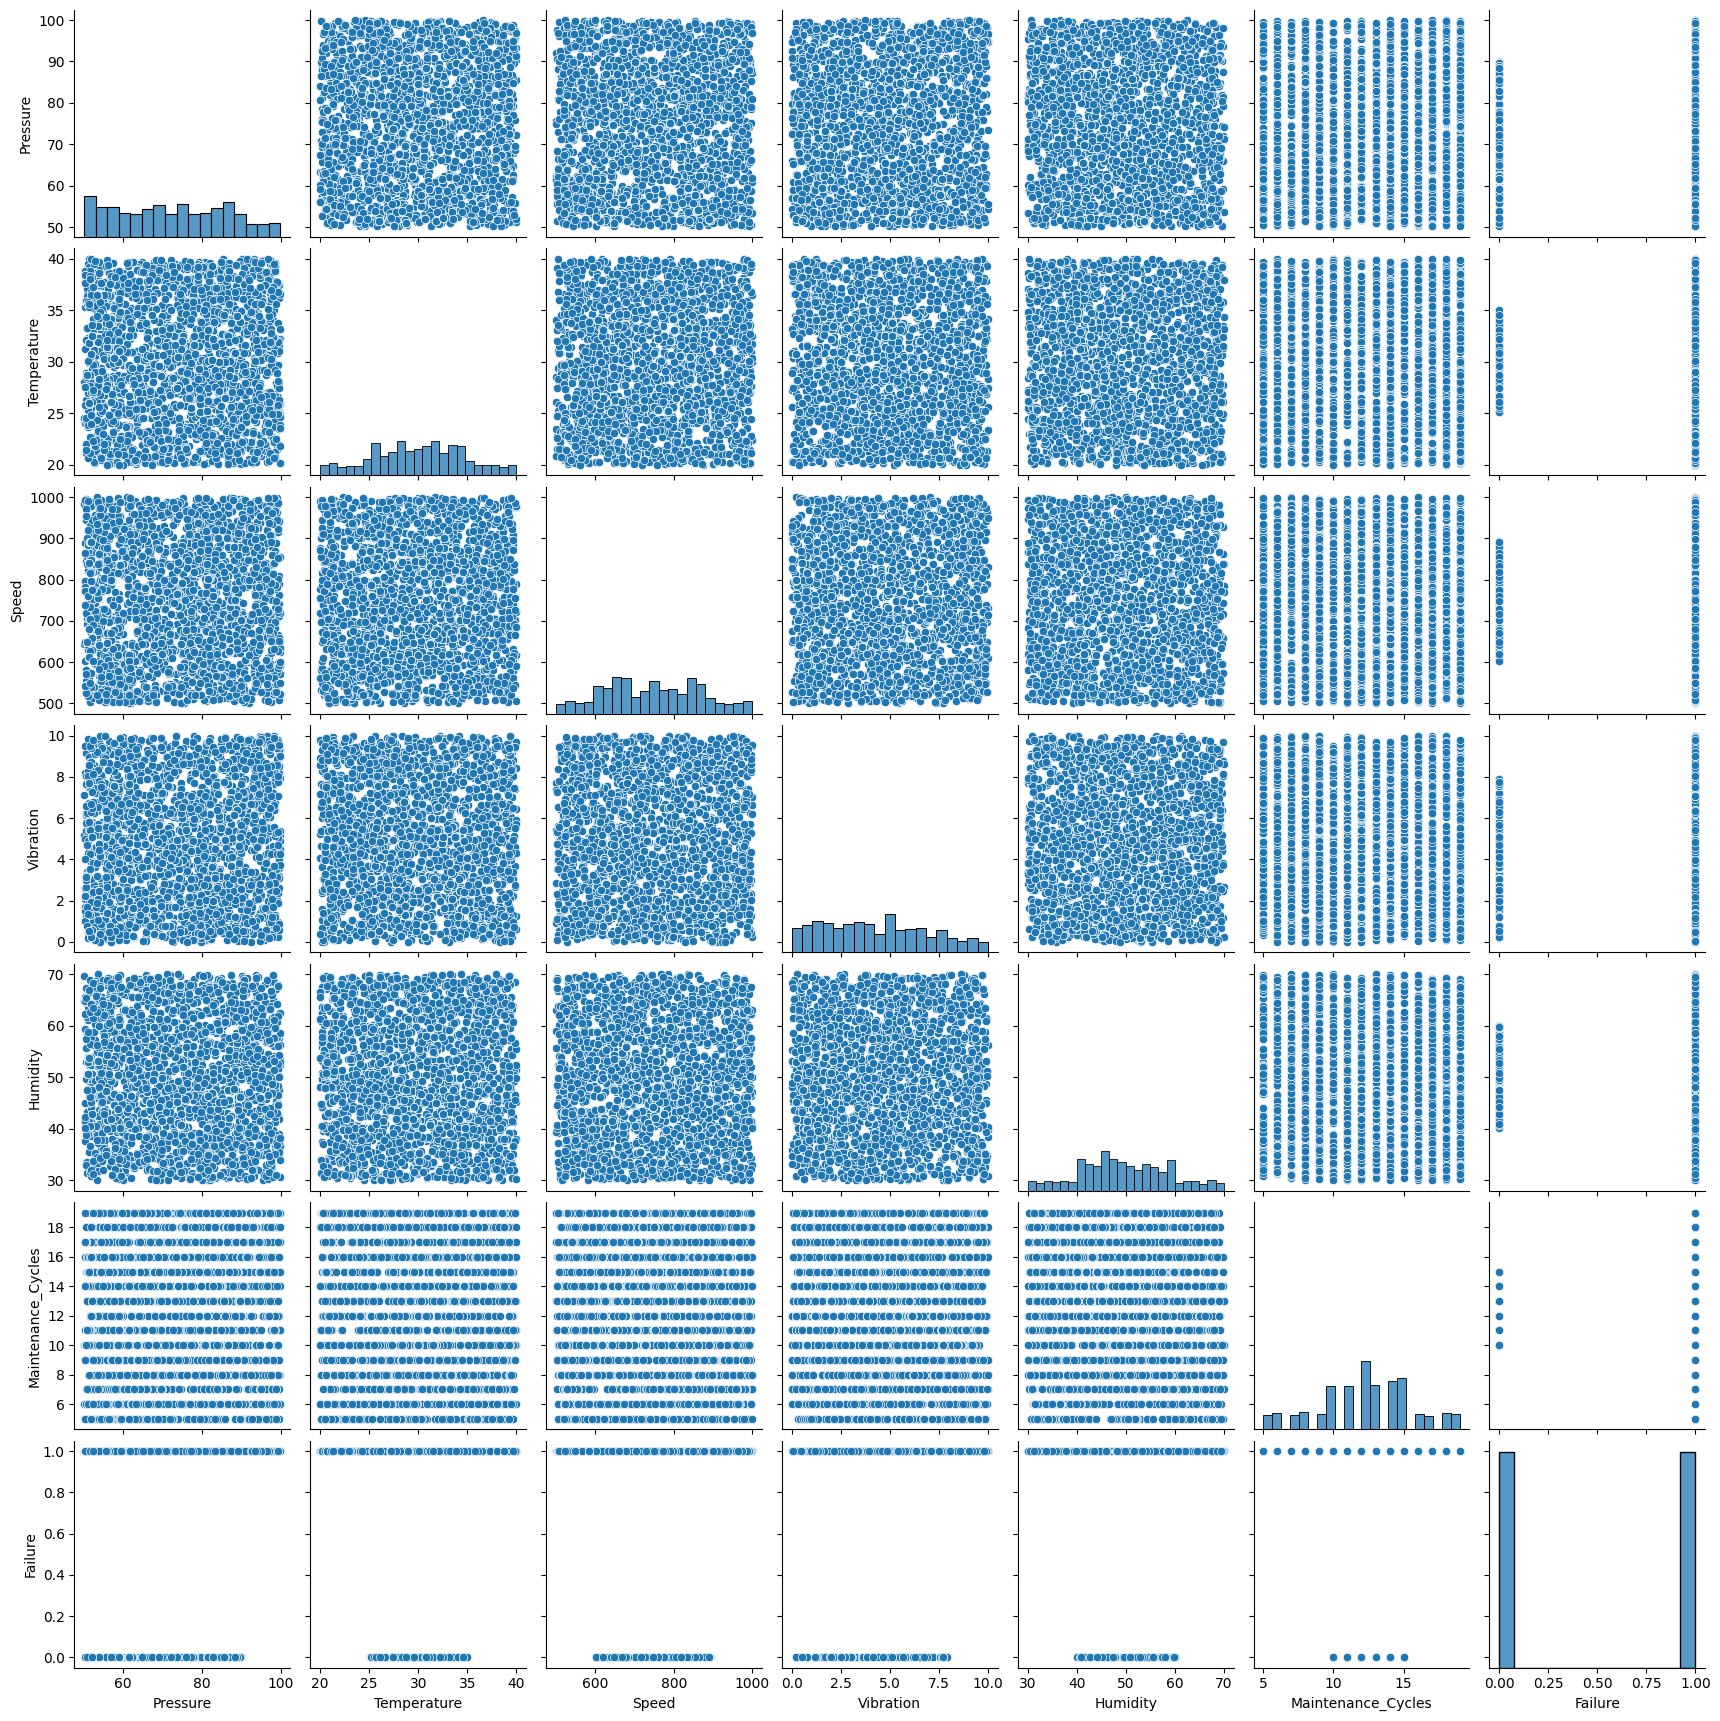

In [ ]:
# Pairplot for numerical variables
sns.pairplot(df[numerical_features])
plt.show()

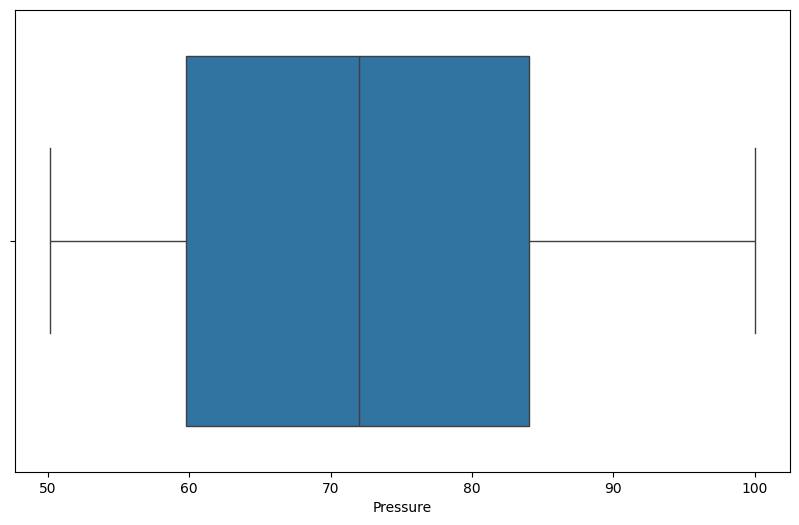

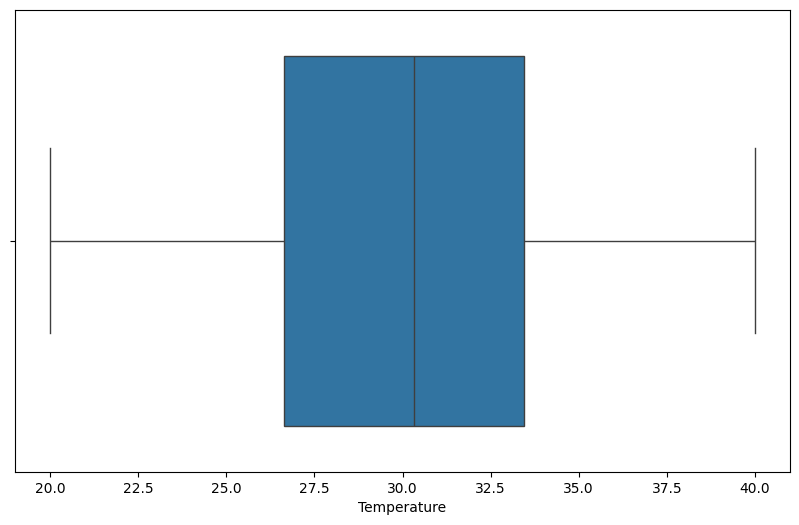

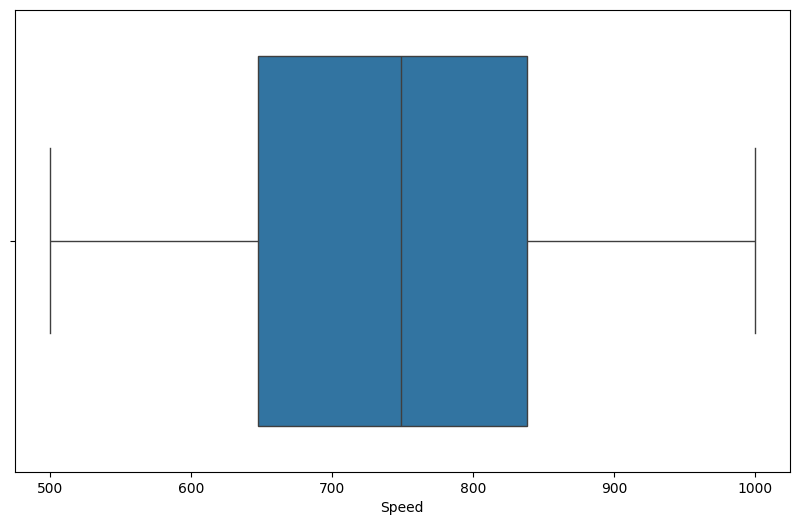

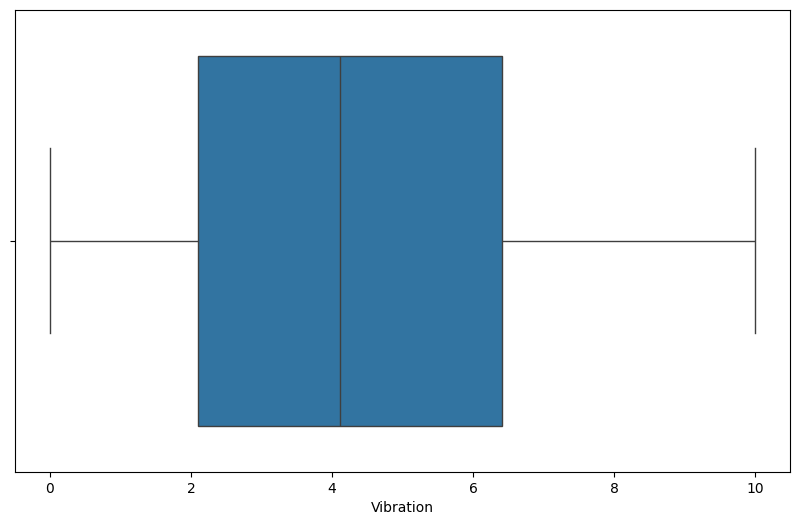

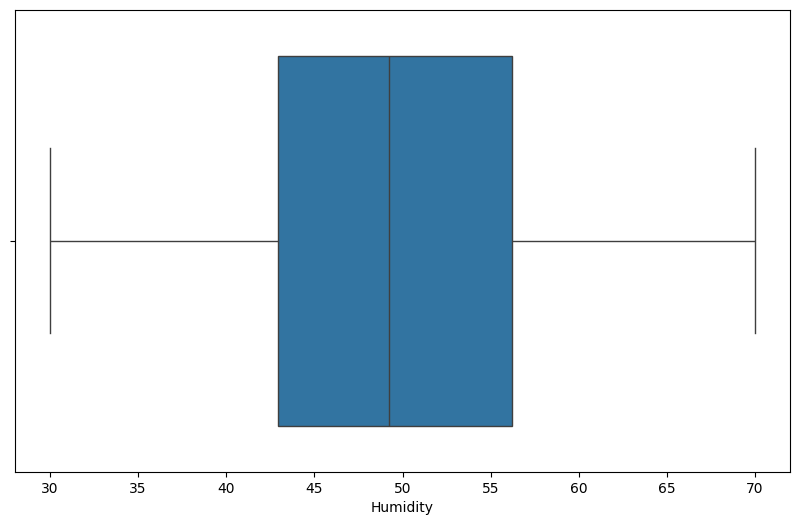

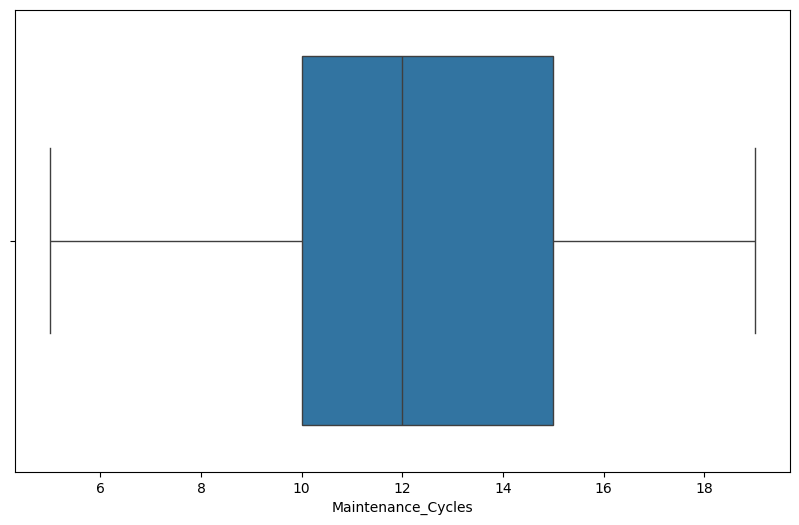

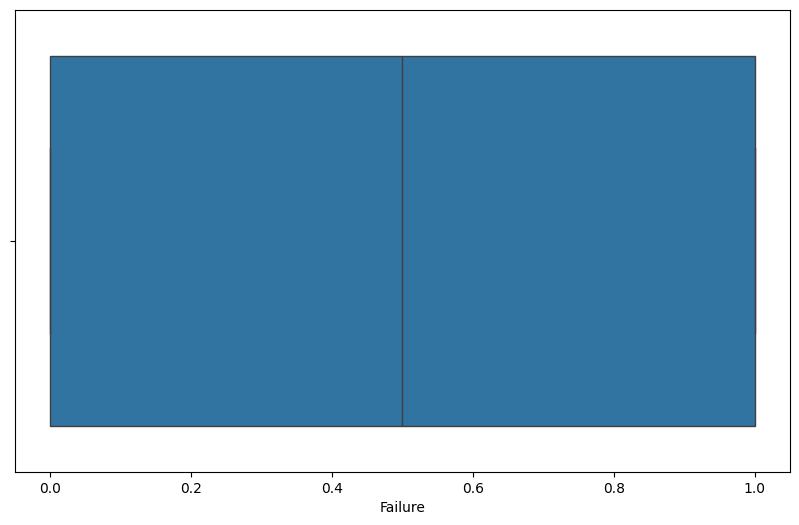

In [ ]:
# Boxplot to detect outliers
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.show()

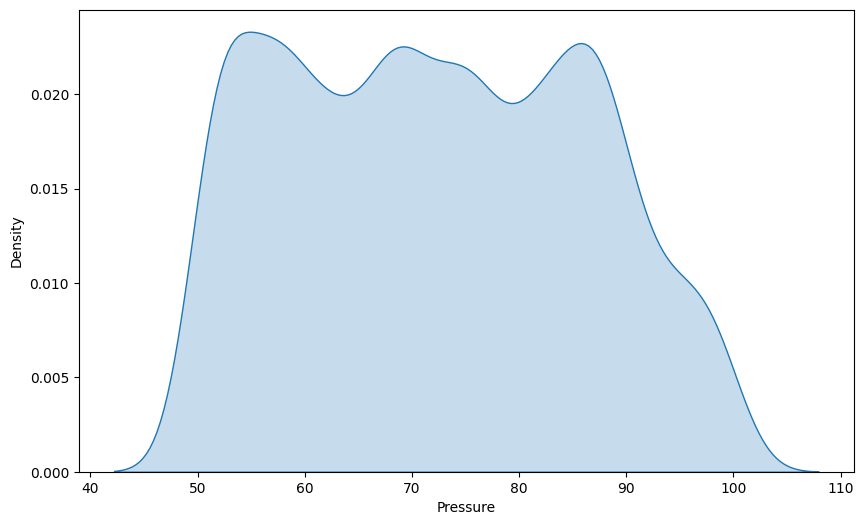

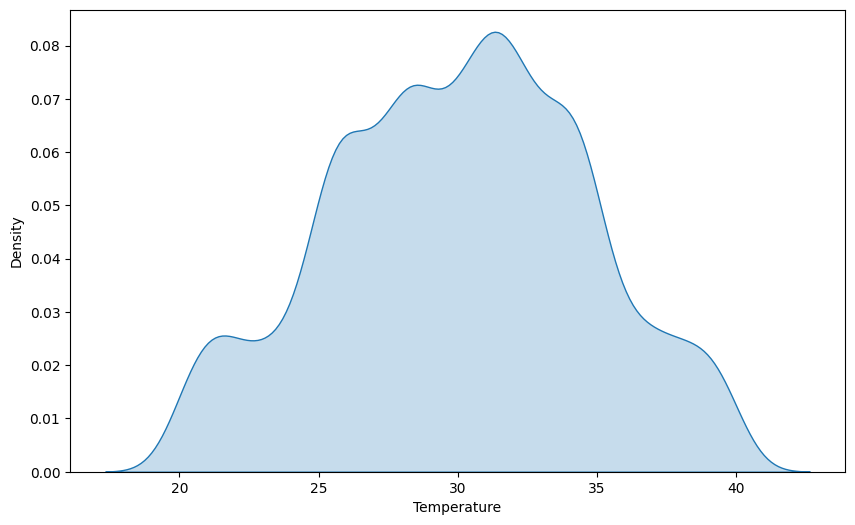

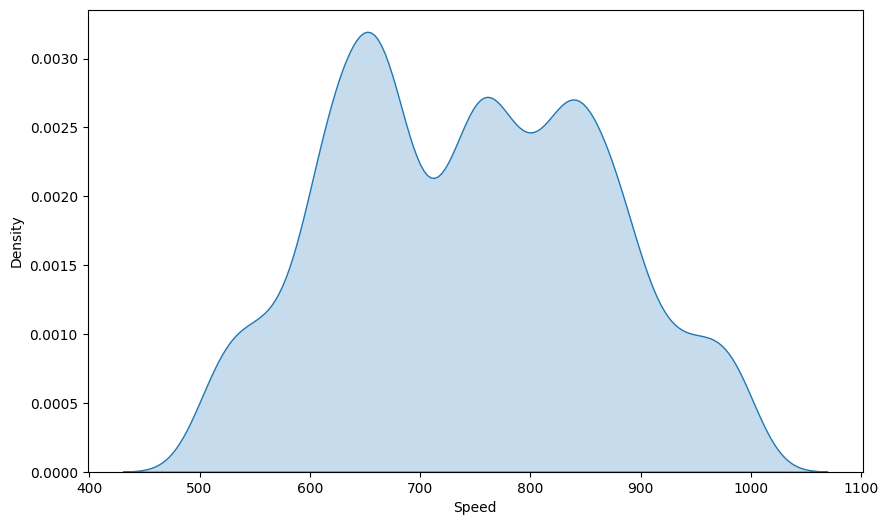

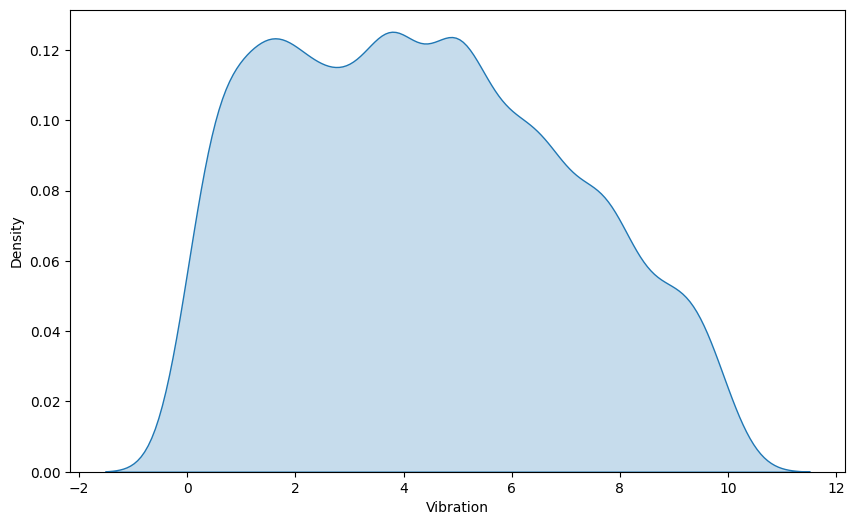

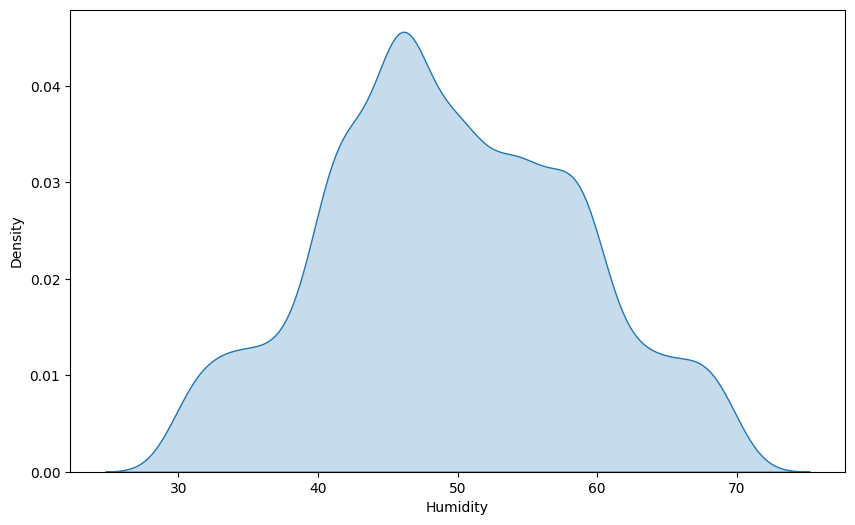

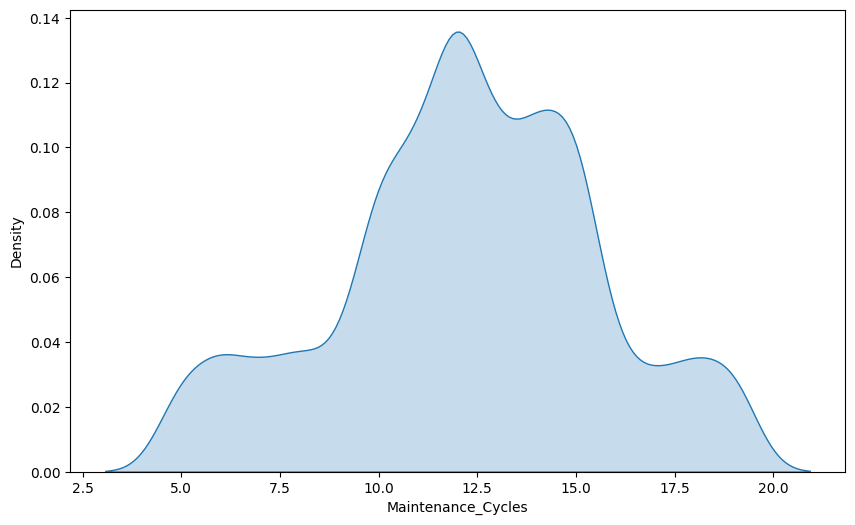

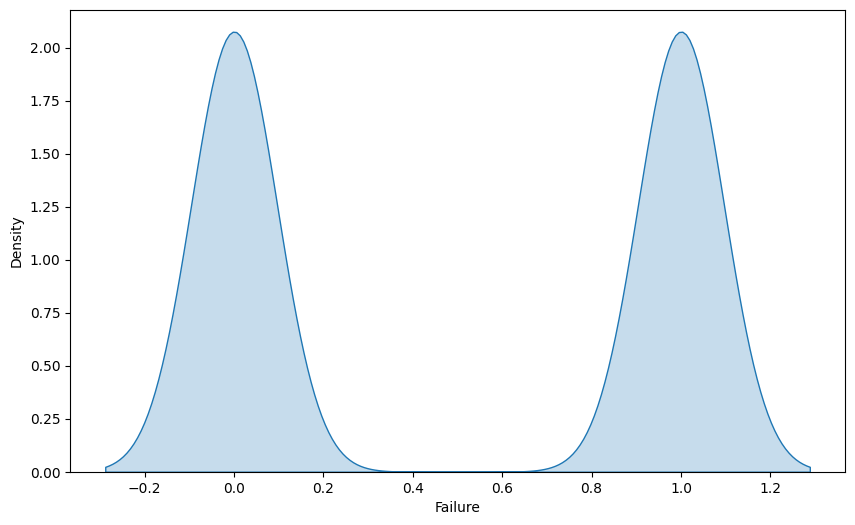

In [ ]:
#Univariate Analysis
# KDE plot for numerical variables
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df[feature], fill=True)
    plt.show()

**MODEL BUILDING & EVALUATING**

In [ ]:
# Introducing failure conditions for each parameter
#failure_condition_pressure = (data['Pressure'] > 90)
#failure_condition_temperature = (data['Temperature'] < 25) | (data['Temperature'] > 35)
#failure_condition_speed = (data['Speed'] < 600) | (data['Speed'] > 900)
#failure_condition_vibration = (data['Vibration'] > 8)
#failure_condition_humidity = (data['Humidity'] < 40) | (data['Humidity'] > 60)
#failure_condition_maintenance_cycles = (data['Maintenance_Cycles'] < 10) | (data['Maintenance_Cycles'] > 15)


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neighbors import KNeighborsClassifier


import warnings
warnings.filterwarnings('ignore')

# Load your dataset
# Replace 'your_dataset.csv' with the actual file path
data = pd.read_csv('/content/Tablet_press_data.csv')

# Assume 'target' is the column indicating failure (1 for failure, 0 for no failure)
X = data.drop('Failure', axis=1)
y = data['Failure']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 1: Random Forest Classifier
rf_model = RandomForestClassifier()
# Train the model
rf_model.fit(X_train_scaled, y_train)
# Make predictions
rf_predictions = rf_model.predict(X_test_scaled)
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

# Model 2: Support Vector Classifier (SVM)
svm_model = SVC()
# Train the model
svm_model.fit(X_train_scaled, y_train)
# Make predictions
svm_predictions = svm_model.predict(X_test_scaled)
print("Support Vector Classifier:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))

# Model 3: K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
# Train the model
knn_model.fit(X_train_scaled, y_train)
# Make predictions
knn_predictions = knn_model.predict(X_test_scaled)
print("K-Nearest Neighbors:")
print("Accuracy:", accuracy_score(y_test, knn_predictions))
print(classification_report(y_test, knn_predictions))

# Model 4: Naive bayes
nb_model = GaussianNB()
# Train the model
nb_model.fit(X_train_scaled, y_train)
# Make predictions
nb_pred = nb_model.predict(X_test_scaled)
print("Naive bayes:")
print("Accuracy:", accuracy_score(y_test,nb_pred))
print(classification_report(y_test,nb_pred))


# Model 5: Gaussian Process Classifier
gp_model = GaussianProcessClassifier(kernel=RBF())
# Train the model
gp_model.fit(X_train_scaled, y_train)
# Make predictions
gp_pred = gp_model.predict(X_test_scaled)
print("Gaussian Process Classifier:")
print("Accuracy:", accuracy_score(y_test,gp_pred))
print(classification_report(y_test,gp_pred))

Random Forest Classifier:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       397
           1       1.00      1.00      1.00       366

    accuracy                           1.00       763
   macro avg       1.00      1.00      1.00       763
weighted avg       1.00      1.00      1.00       763

Support Vector Classifier:
Accuracy: 0.9698558322411533
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       397
           1       1.00      0.94      0.97       366

    accuracy                           0.97       763
   macro avg       0.97      0.97      0.97       763
weighted avg       0.97      0.97      0.97       763

K-Nearest Neighbors:
Accuracy: 0.9528178243774574
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       397
           1       1.00      0.90      0.95       366

    accuracy                        

In [ ]:
rfcl = RandomForestClassifier(n_estimators=100, random_state = 1)
rfcl.fit(X_train, y_train)

rfcl_train_acc = rfcl.score(X_train,y_train)
print('Accuracy score for train data',rfcl_train_acc)

rfcl_test_acc = rfcl.score(X_test,y_test)
print('Accuracy score for test data',rfcl_test_acc)

Accuracy score for train data 1.0
Accuracy score for test data 1.0


In [ ]:
predicted = rfcl.predict(X_test)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       397
           1       1.00      1.00      1.00       366

    accuracy                           1.00       763
   macro avg       1.00      1.00      1.00       763
weighted avg       1.00      1.00      1.00       763



In [ ]:
grid = {'max_depth': [5,6,7,8],
        'max_features': [3,4,5],
        'min_samples_leaf': [10,20,30],
        'min_samples_split': [50,60,70,80],
        'n_estimators': [100,120,150,180]
        }

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = grid, cv = 5, n_jobs=-1) #gridsearch with cv = 10
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8], 'max_features': [3, 4, 5],
                         'min_samples_leaf': [10, 20, 30],
                         'min_samples_split': [50, 60, 70, 80],
                         'n_estimators': [100, 120, 150, 180]})

In [ ]:
print(grid_search.best_params_) #best parameters of RF for tuning

best_grid = grid_search.best_estimator_ #acquiring the best estimator for RF
print(best_grid)

{'max_depth': 8, 'max_features': 3, 'min_samples_leaf': 10, 'min_samples_split': 70, 'n_estimators': 150}
RandomForestClassifier(max_depth=8, max_features=3, min_samples_leaf=10,
                       min_samples_split=70, n_estimators=150)


In [ ]:
grid_rfcl_train_acc = best_grid.score(X_train,y_train)
print('Accuracy score for train data',grid_rfcl_train_acc)

grid_rfcl_test_acc = best_grid.score(X_test,y_test)
print('Accuracy score for test data',grid_rfcl_test_acc)

Accuracy score for train data 0.9970501474926253
Accuracy score for test data 0.9921363040629095


In [ ]:
grid_rfcl_pred = best_grid.predict(X_train) #prediction of the training set
grid_rfcl_pred1 = best_grid.predict(X_test) #prediction of the test set

grid_rfcl_prob = best_grid.predict_proba(X_train) #probability prediction of the training set
grid_rfcl_prob1 = best_grid.predict_proba(X_test) #probability prediction of the test set

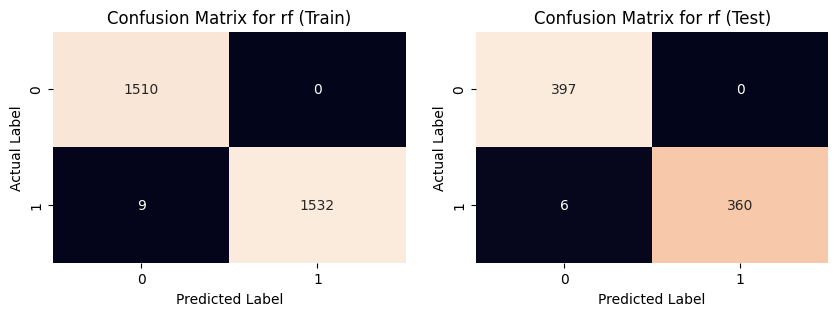

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
sns.heatmap(metrics.confusion_matrix(y_train,grid_rfcl_pred),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for rf (Train)')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

plt.subplot(1,2,2)
sns.heatmap(metrics.confusion_matrix(y_test,grid_rfcl_pred1),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for rf (Test)')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [ ]:
#classification report of training and test set

print('Classification Report for the training set\n\n',metrics.classification_report(y_train, grid_rfcl_pred),'\n')
print('Classification Report for the test set\n\n',metrics.classification_report(y_test, grid_rfcl_pred1))

Classification Report for the training set

               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1510
           1       1.00      0.99      1.00      1541

    accuracy                           1.00      3051
   macro avg       1.00      1.00      1.00      3051
weighted avg       1.00      1.00      1.00      3051
 

Classification Report for the test set

               precision    recall  f1-score   support

           0       0.99      1.00      0.99       397
           1       1.00      0.98      0.99       366

    accuracy                           0.99       763
   macro avg       0.99      0.99      0.99       763
weighted avg       0.99      0.99      0.99       763



In [ ]:
data = {
    'Pressure': int(input(" enter the pressure value : ")),
    'Temperature': int(input(" enter the temperature value : ")),
    'Speed': int(input(" enter the speed value : ")),
    'Vibration': int(input(" enter the vibration value : ")),
    'Humidity': int(input(" enter the humidity value : ")),
    'Maintenance_Cycles': int(input(" enter the maintenance value : ")),
    'Failure':[0]
}
df = pd.DataFrame(data)

# Display the DataFrame
print(df)
# Read the new data
new_data = df

# Assuming 'target' is the column indicating failure (remove it for prediction)
new_data_features = new_data.drop('Failure', axis=1)

# Preprocess and standardize the new data
new_data_features_scaled = scaler.transform(new_data_features)

# Make predictions using the trained models
rf_predictions = rf_model.predict(new_data_features_scaled)
if(rf_predictions==0):
  print("No Maintenance is required")
else:
  print("Maintenance is required")

 enter the pressure value : 80
 enter the temperature value : 30
 enter the speed value : 700
 enter the vibration value : 6
 enter the humidity value : 50
 enter the maintenance value : 12
   Pressure  Temperature  Speed  Vibration  Humidity  Maintenance_Cycles  \
0        80           30    700          6        50                  12   

   Failure  
0        0  
No Maintenance is required
